In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
X_train_path = 'D:\\Image Classification CNN Keras Dataset\\input.csv'
Y_train_path = 'D:\\Image Classification CNN Keras Dataset\\labels.csv'
X_test_path = 'D:\\Image Classification CNN Keras Dataset\\input_test.csv'
Y_test_path = 'D:\\Image Classification CNN Keras Dataset\\labels_test.csv'
X_train = np.loadtxt(X_train_path, delimiter=',')
Y_train = np.loadtxt(Y_train_path, delimiter=',')
X_test = np.loadtxt(X_test_path, delimiter=',')
Y_test = np.loadtxt(Y_test_path, delimiter=',')

In [3]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)
X_train = X_train/255.0
x_test = X_test/255.0

In [4]:
print("Shape of X_train  :",X_train.shape)
print("Shape of Y_train ",Y_train.shape)
print("Shape of X_test  :",X_test.shape)
print("Shape of Y_test ",Y_test.shape)

Shape of X_train  : (2000, 100, 100, 3)
Shape of Y_train  (2000, 1)
Shape of X_test  : (400, 100, 100, 3)
Shape of Y_test  (400, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

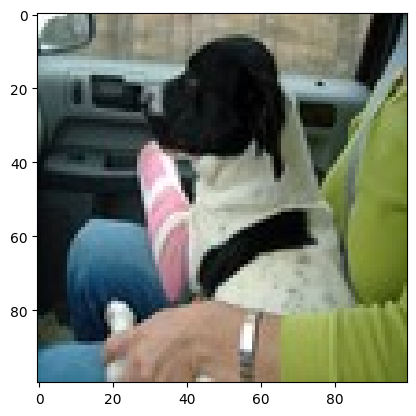

In [5]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(8,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))


c:\Users\mvnik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss ='binary_crossentropy',optimizer ='adam',metrics=['accuracy'])

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
batch_size = 100
max_epochs = 30
early_stopping = EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = max_epochs, validation_data = (x_test,Y_test),
                    callbacks =[early_stopping] )

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.5156 - loss: 0.6944 - val_accuracy: 0.5200 - val_loss: 0.6902
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.5473 - loss: 0.6869 - val_accuracy: 0.6050 - val_loss: 0.6702
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.5828 - loss: 0.6674 - val_accuracy: 0.6275 - val_loss: 0.6603
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.6445 - loss: 0.6416 - val_accuracy: 0.6150 - val_loss: 0.6555
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.6634 - loss: 0.6186 - val_accuracy: 0.6550 - val_loss: 0.6372
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.6930 - loss: 0.5999 - val_accuracy: 0.6450 - val_loss: 0.6256
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.7047 - loss: 0.5660 - val_accuracy: 0.6975 - val_loss: 0.6148
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.7122 - loss: 0.5501 - val_accuracy: 0.

In [9]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7803 - loss: 38.5886


[67.3432388305664, 0.6575000286102295]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [17.0..244.0].


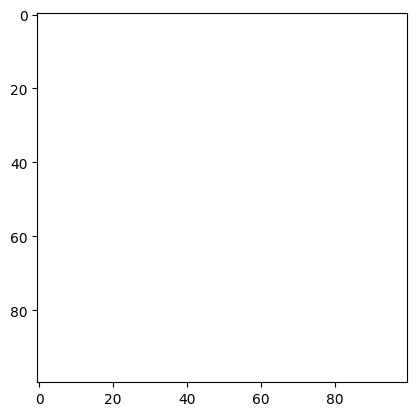

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Our model says it is a : cat


In [10]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)